In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv('RawAveragesSummary_run994.csv')
data.head(5)

,Time [ns],Channel1 [mV],Channel2 [mV],Channel4 [mV],Channel5 [mV]
0,0,-0.817,-17.270,4.826,-1.675
1,2,-0.508,-16.701,2.152,-2.460
2,4,-0.142,-15.669,-0.616,-3.338
3,6,0.345,-14.335,-3.272,-4.238
4,8,0.875,-13.019,-5.672,-5.100


In [3]:
data.columns = [c.strip() for c in data.columns.values.tolist()]

In [4]:
data.columns

Index(['Time [ns]', 'Channel1 [mV]', 'Channel2 [mV]', 'Channel4 [mV]',
       'Channel5 [mV]'],
      dtype='object')

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0.5, 1.0, 'Channel 1')

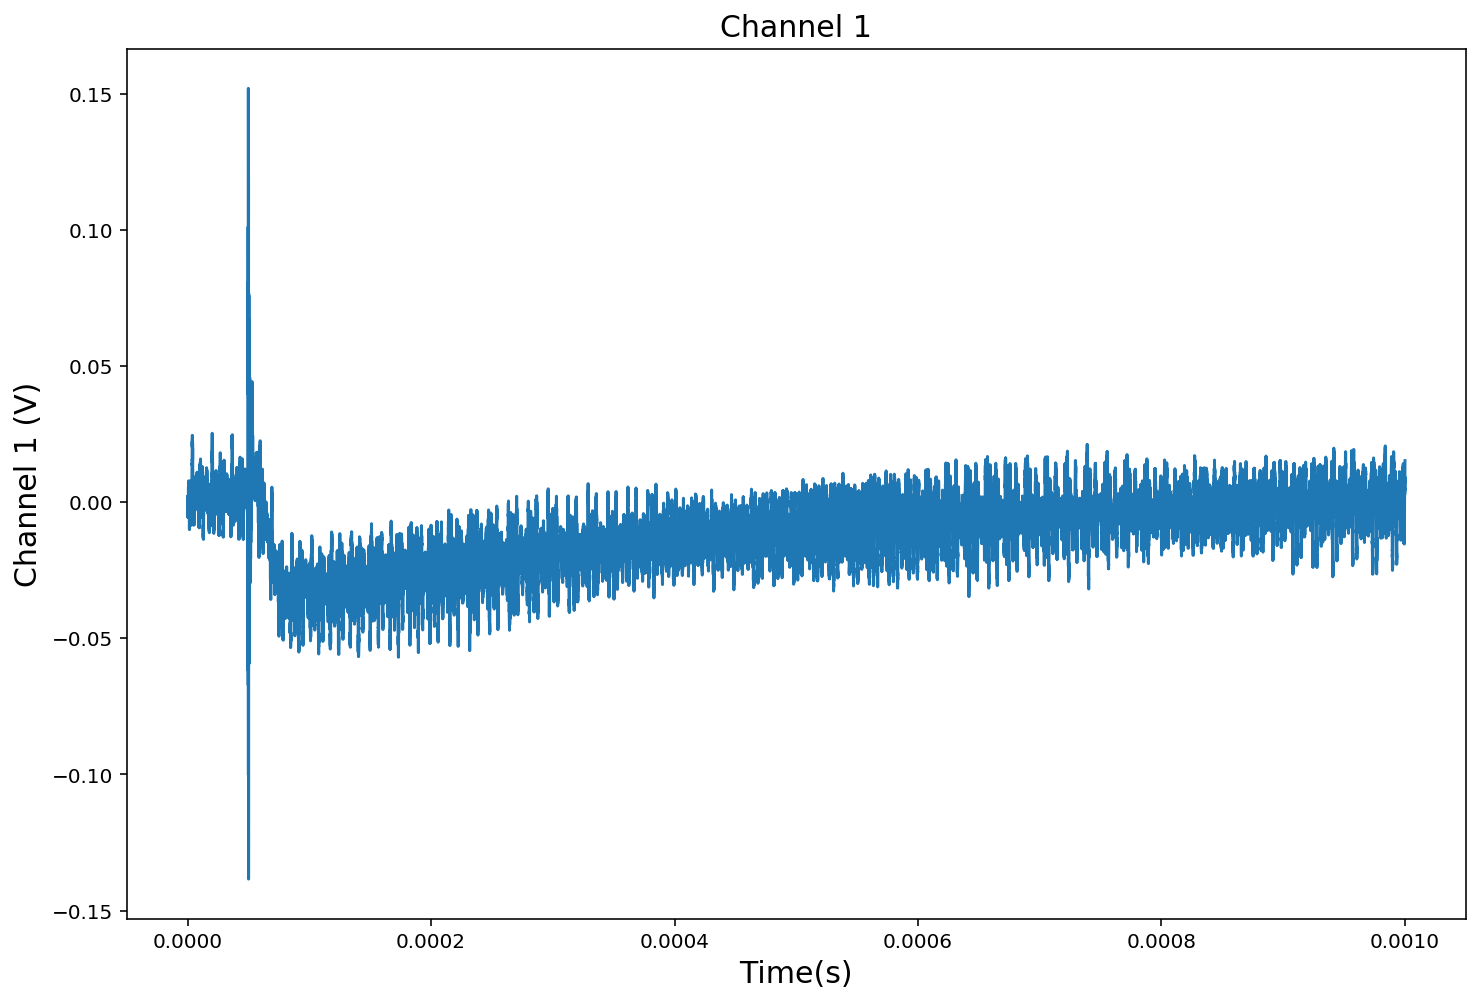

In [5]:
dt = 2 * 1e-9
t = data['Time [ns]'] * 1e-9
f = data['Channel1 [mV]'] * 1e-3

plt.figure(figsize=(12, 8))
plt.plot(t, f)
plt.xlabel('Time(s)', fontsize=15)
plt.ylabel('Channel 1 (V)', fontsize=15)
plt.title('Channel 1', fontsize=15)

Text(0, 0.5, 'Amplitude')

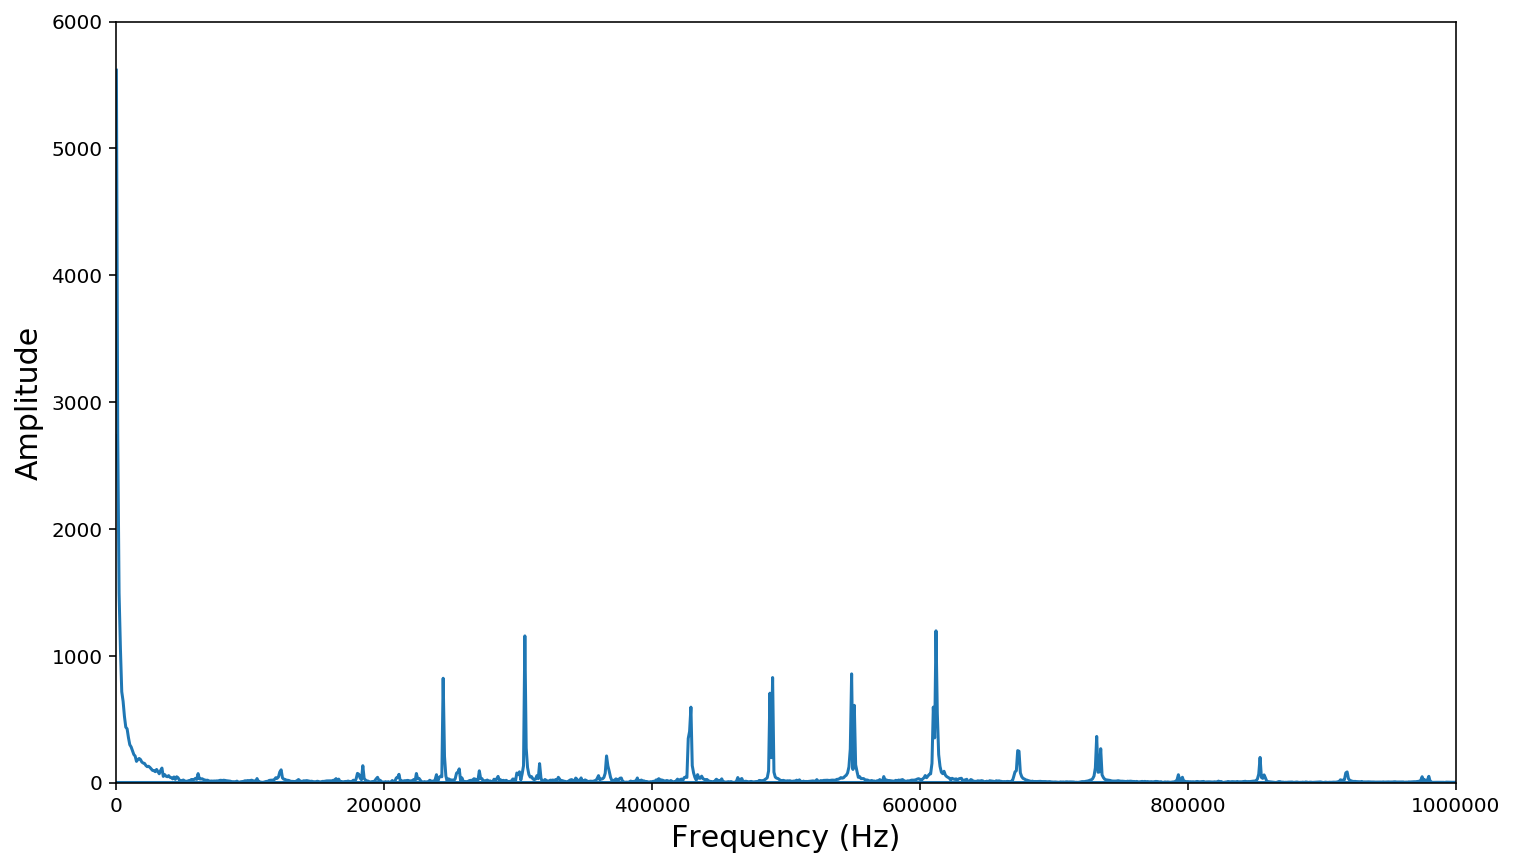

In [6]:
n = len(t)
fhat = np.fft.fft(f)
xf = np.fft.fftfreq(n, dt)

plt.plot(xf,np.abs(fhat))
plt.axis([0, 1e6, 0, 6000])
plt.xlabel('Frequency (Hz)', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)

Text(0.5, 1.0, 'Power spectrum with noise')

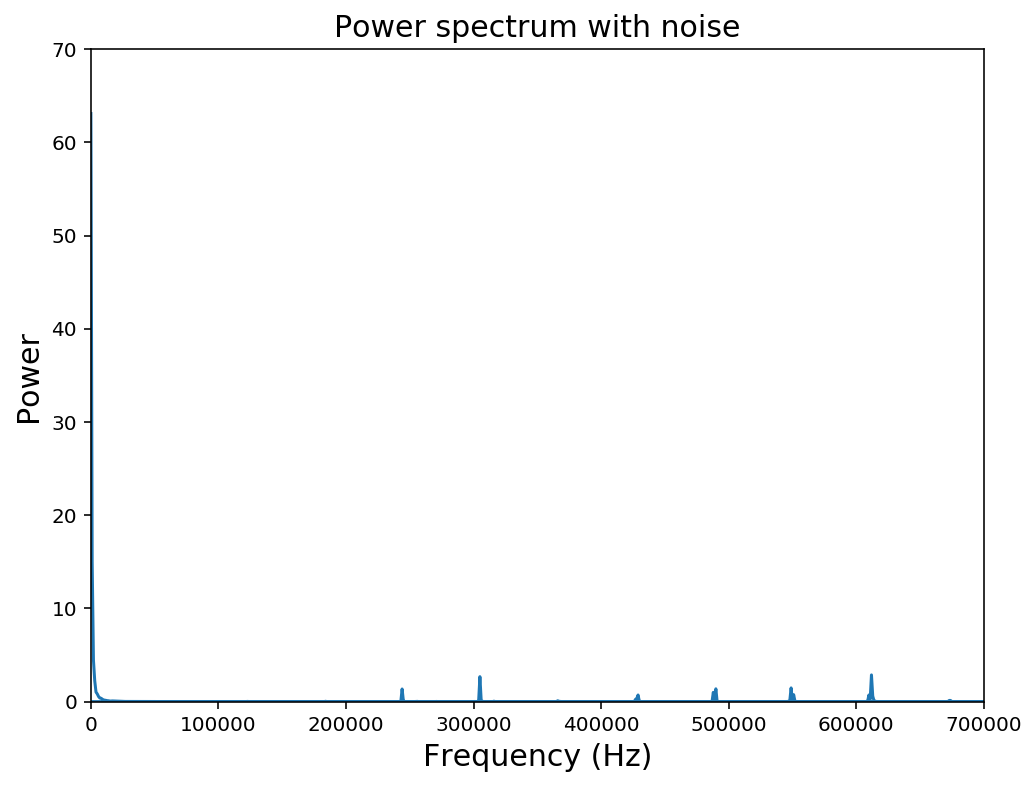

In [7]:
# Power Spectrum
power = np.abs(fhat)**2/n
plt.figure(figsize=(8, 6))
plt.plot(xf,power)
plt.axis([0, 7e5, 0, 70])
plt.xlabel("Frequency (Hz)", fontsize=15)
plt.ylabel("Power", fontsize=15)
plt.title("Power spectrum with noise", fontsize=15)

## Cleaning Data/Noise

In [8]:
# Trying different cut off frequencies.
lowfreq = 4e5
myindex = 0
for index in range(xf.size):
    if (xf[index]>lowfreq):
        myindex=index
        break
new_fhat = fhat.copy()
new_fhat[myindex:]=0
sig1 = np.fft.ifft(new_fhat)

In [9]:
lowfreq = 3e5
myindex = 0
for index in range(xf.size):
    if (xf[index]>lowfreq):
        myindex=index
        break
new_fhat = fhat.copy()
new_fhat[myindex:]=0
sig2 = np.fft.ifft(new_fhat)

In [10]:
lowfreq = 2e5
myindex = 0
for index in range(xf.size):
    if (xf[index]>lowfreq):
        myindex=index
        break
new_fhat = fhat.copy()
new_fhat[myindex:]=0
sig3 = np.fft.ifft(new_fhat)

/usr/lib/python3/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Channel 1 (V)')

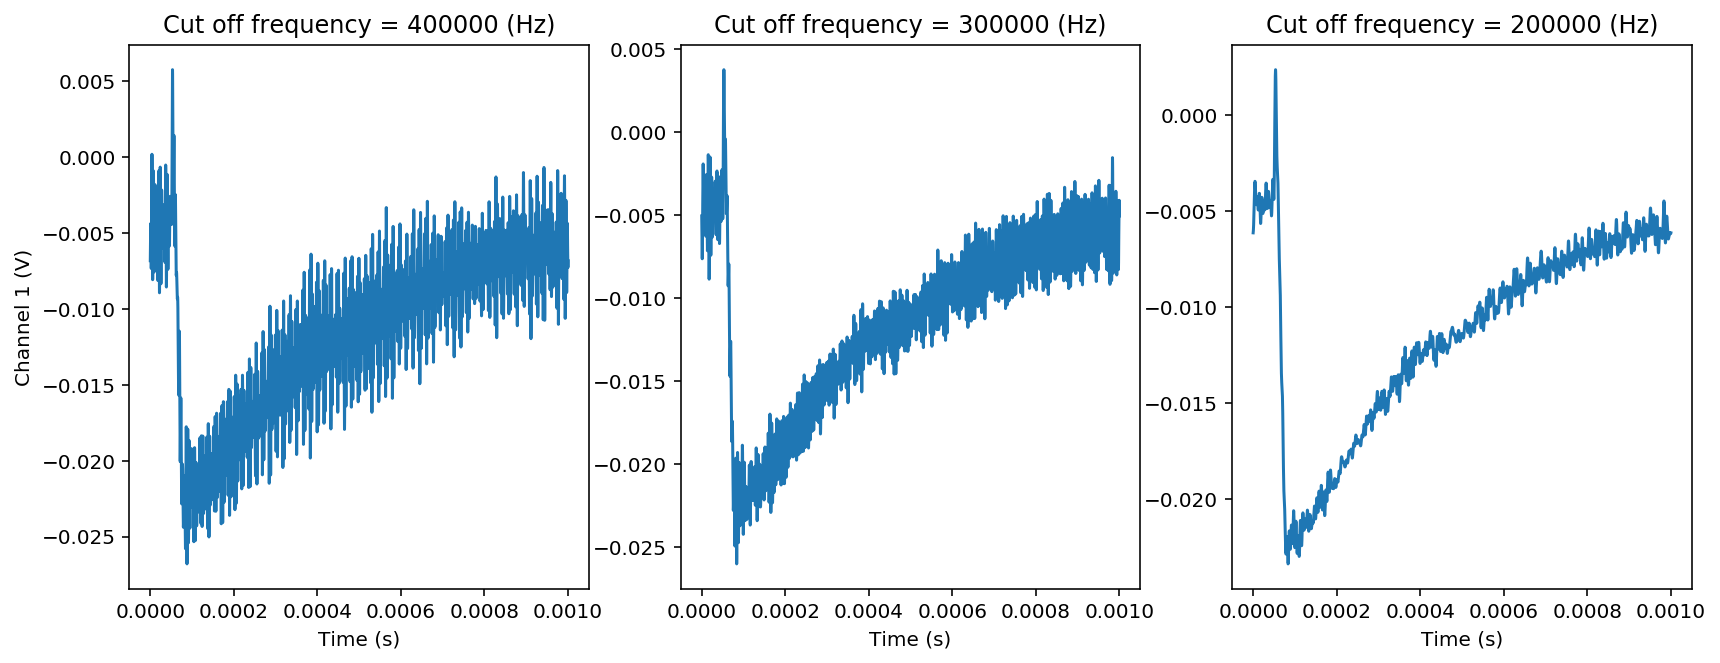

In [11]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(14, 5))
axes[0].plot(t, sig1)
axes[1].plot(t, sig2)
axes[2].plot(t, sig3)
axes[0].title.set_text('Cut off frequency = 400000 (Hz)')
axes[1].title.set_text('Cut off frequency = 300000 (Hz)')
axes[2].title.set_text('Cut off frequency = 200000 (Hz)')
axes[0].set_xlabel("Time (s)")
axes[1].set_xlabel("Time (s)")
axes[2].set_xlabel("Time (s)")
axes[0].set_ylabel("Channel 1 (V)")

## Plotting Cleaned data

In [12]:
lowfreq = 2e5
myindex = 0
for index in range(xf.size):
    if (xf[index]>lowfreq):
        myindex=index
        break
new_fhat = fhat.copy()
new_fhat[myindex:]=0
signal_filtered = np.fft.ifft(new_fhat) # inverse fft

Text(0.5, 1.0, 'Power spectrum without noise')

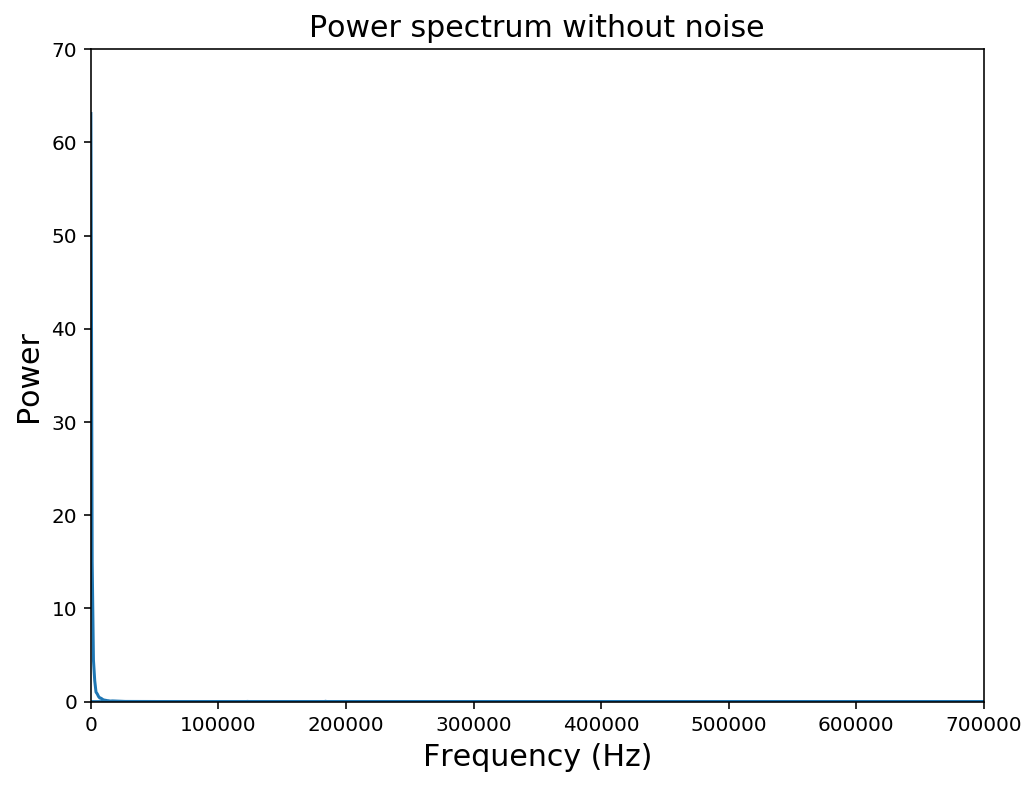

In [13]:
power2 = new_fhat * np.conj(new_fhat) / n

plt.figure(figsize=(8, 6))
plt.plot(xf,power2)
plt.axis([0, 7e5, 0, 70])
plt.xlabel("Frequency (Hz)", fontsize=15)
plt.ylabel("Power", fontsize=15)
plt.title("Power spectrum without noise", fontsize=15)

Text(0, 0.5, 'Channel1 (V)')

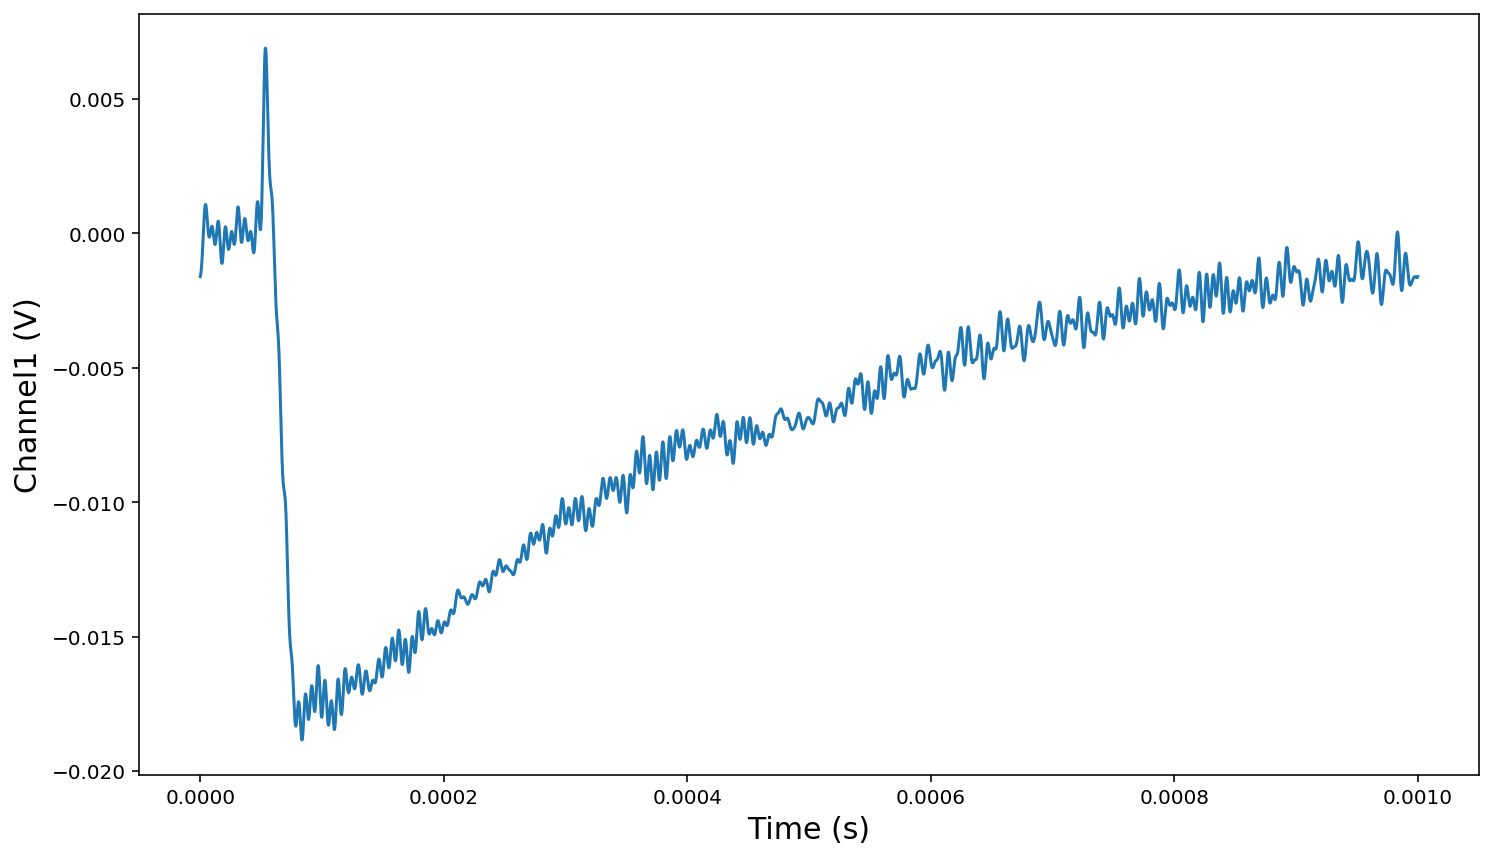

In [14]:
#signal_filtered += 0.005 # shifting the graph so that it starts from 0
signal_filtered -= np.mean(signal_filtered[:25000])

plt.plot(t, signal_filtered)
plt.xlabel("Time (s)", fontsize = 15)
plt.ylabel("Channel1 (V)", fontsize = 15)

# Cleaning different Channels

#### Channel 2 

In [15]:
data.columns

Index(['Time [ns]', 'Channel1 [mV]', 'Channel2 [mV]', 'Channel4 [mV]',
       'Channel5 [mV]'],
      dtype='object')

In [16]:
f2 = data['Channel2 [mV]'] * 1e-3
#plt.figure(figsize=(12, 8))
#plt.plot(t, f2)
#plt.xlabel('Time(s)', fontsize=15)
#plt.ylabel('Channel 2 (V)', fontsize=15)
#plt.title('Channel 2', fontsize=15)

In [17]:
fhat2 = np.fft.fft(f2)
#plt.plot(xf,np.abs(fhat2))
#plt.axis([0, 1e6, 0, 3000])
#plt.xlabel('Frequency (Hz)', fontsize=15)
#plt.ylabel('Amplitude', fontsize=15)

In [18]:
# Power Spectrum
#power2 = np.abs(fhat2)**2/n
#plt.figure(figsize=(8, 6))
#plt.plot(xf,power2)
#plt.axis([0, 7e5, 0, 20])
#plt.xlabel("Frequency (Hz)", fontsize=15)
#plt.ylabel("Power", fontsize=15)
#plt.title("Power spectrum with noise", fontsize=15)

Text(0, 0.5, 'Channel 2 (V)')

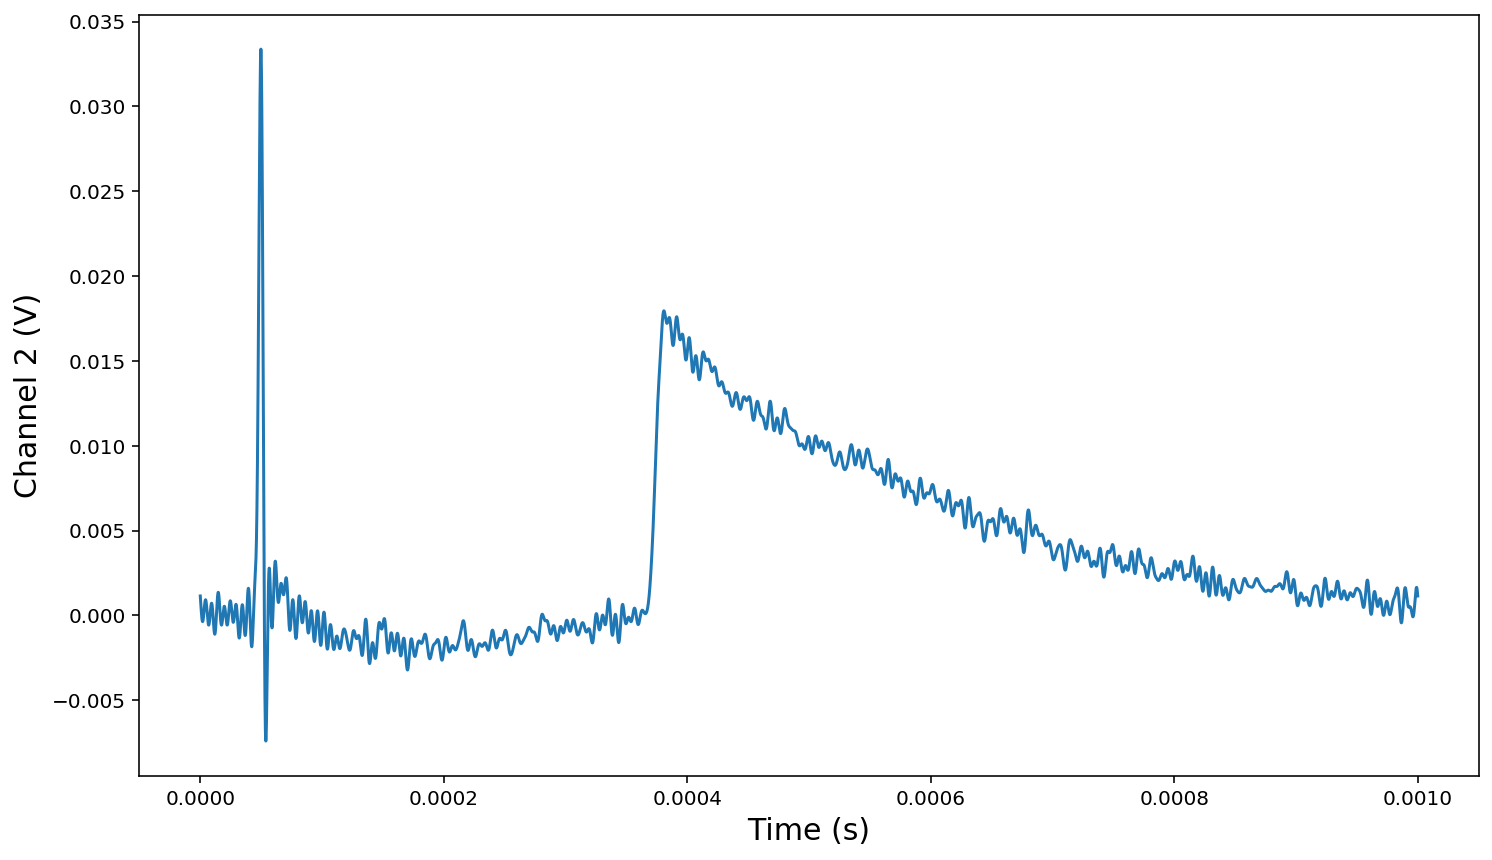

In [19]:
lowfreq = 2e5
myindex = 0
for index in range(xf.size):
    if (xf[index]>lowfreq):
        myindex=index
        break

new_fhat2 = fhat2.copy()
new_fhat2[myindex:]=0
signal_filtered2 = np.fft.ifft(new_fhat2)

#signal_filtered2 -= 0.0015 # again shifting the graph so that it starts from 0
signal_filtered2 -= np.mean(signal_filtered2[:22000])

plt.plot(t, signal_filtered2)
plt.xlabel("Time (s)", fontsize = 15)
plt.ylabel("Channel 2 (V)", fontsize = 15)

#### Channel 4

Text(0, 0.5, 'Channel 4 (V)')

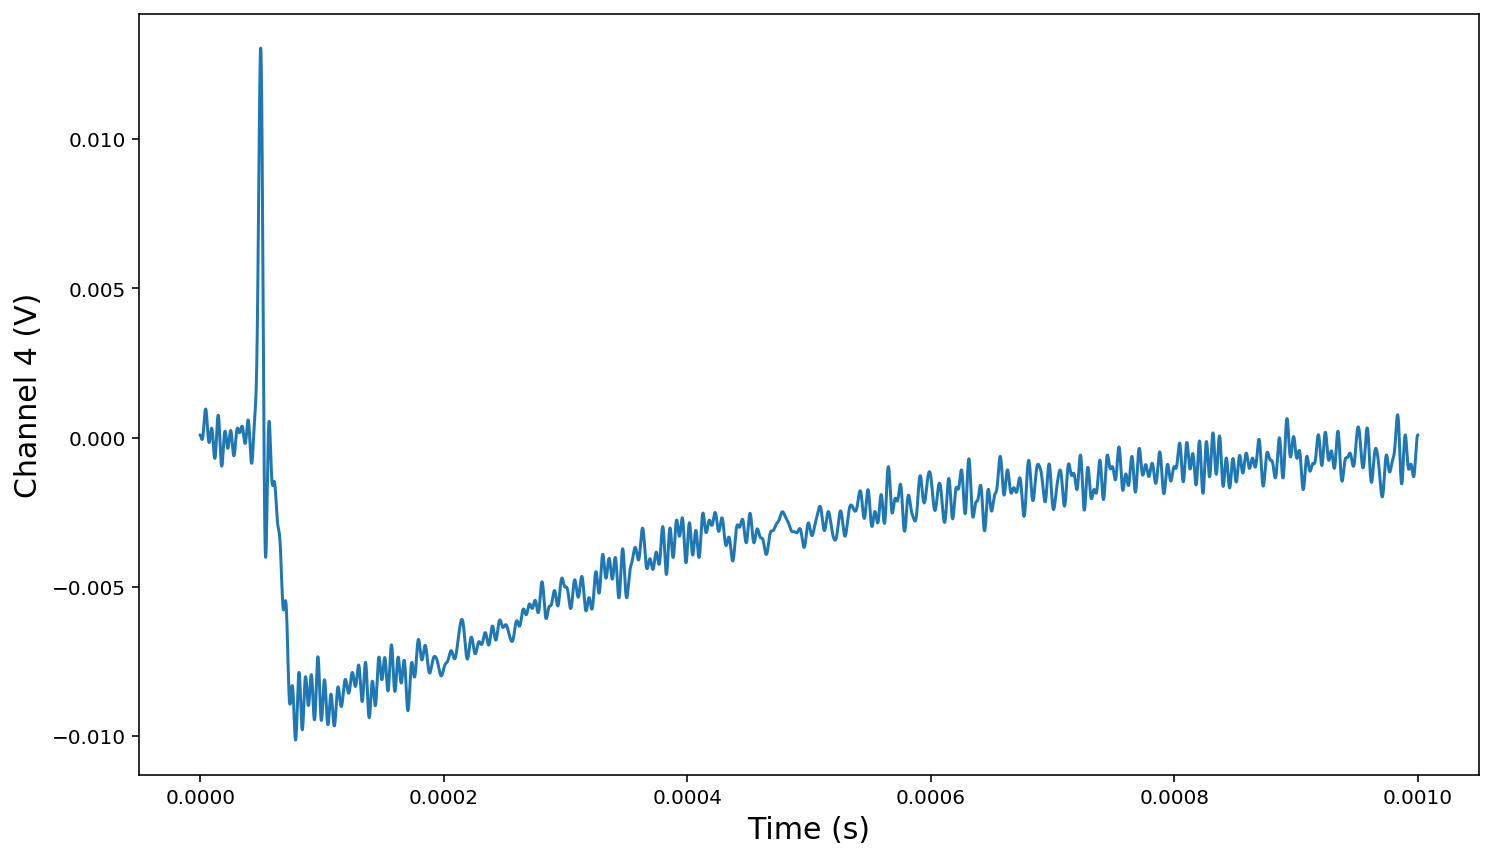

In [20]:
f3 = data['Channel4 [mV]'] * 1e-3
fhat3 = np.fft.fft(f3)

lowfreq = 2e5
myindex = 0
for index in range(xf.size):
    if (xf[index]>lowfreq):
        myindex=index
        break

new_fhat3 = fhat3.copy()
new_fhat3[myindex:]=0
signal_filtered3 = np.fft.ifft(new_fhat3)


signal_filtered3 -= np.mean(signal_filtered3[:22000])

plt.plot(t, signal_filtered3)
plt.xlabel("Time (s)", fontsize = 15)
plt.ylabel("Channel 4 (V)", fontsize = 15)

#### Channel 5

Text(0, 0.5, 'Channel 5 (V)')

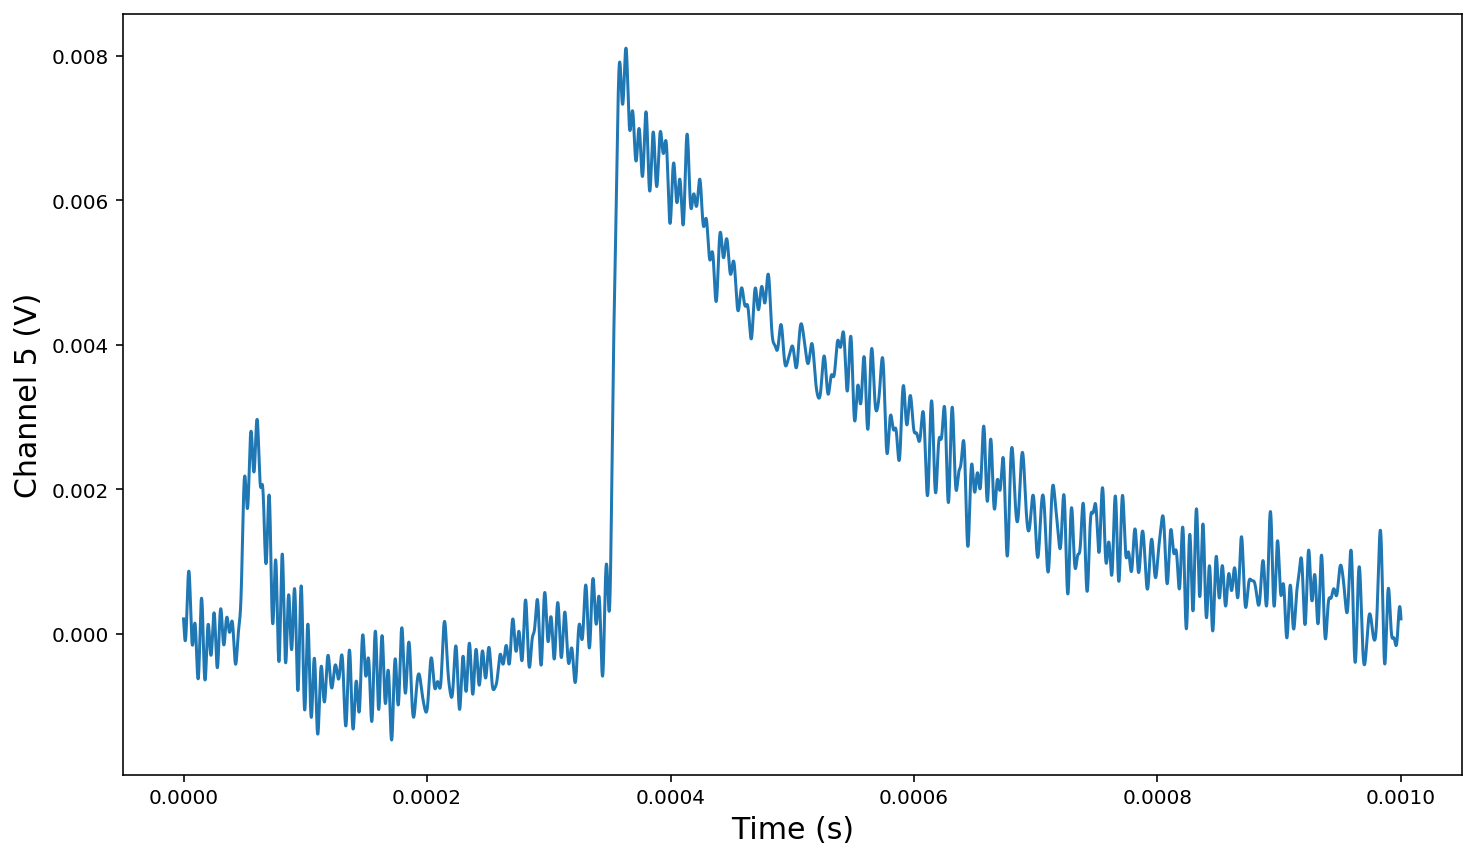

In [21]:
f4 = data['Channel5 [mV]'] * 1e-3
fhat4 = np.fft.fft(f4)

lowfreq = 2e5
myindex = 0
for index in range(xf.size):
    if (xf[index]>lowfreq):
        myindex=index
        break

new_fhat4 = fhat4.copy()
new_fhat4[myindex:]=0
signal_filtered4 = np.fft.ifft(new_fhat4)


#signal_filtered4 -= 0.005
signal_filtered4 -= np.mean(signal_filtered4[:23000])

plt.plot(t, signal_filtered4)
plt.xlabel("Time (s)", fontsize = 15)
plt.ylabel("Channel 5 (V)", fontsize = 15)


## Min and Max points


#### Minimum of channel 1

(-0.022, -0.015)

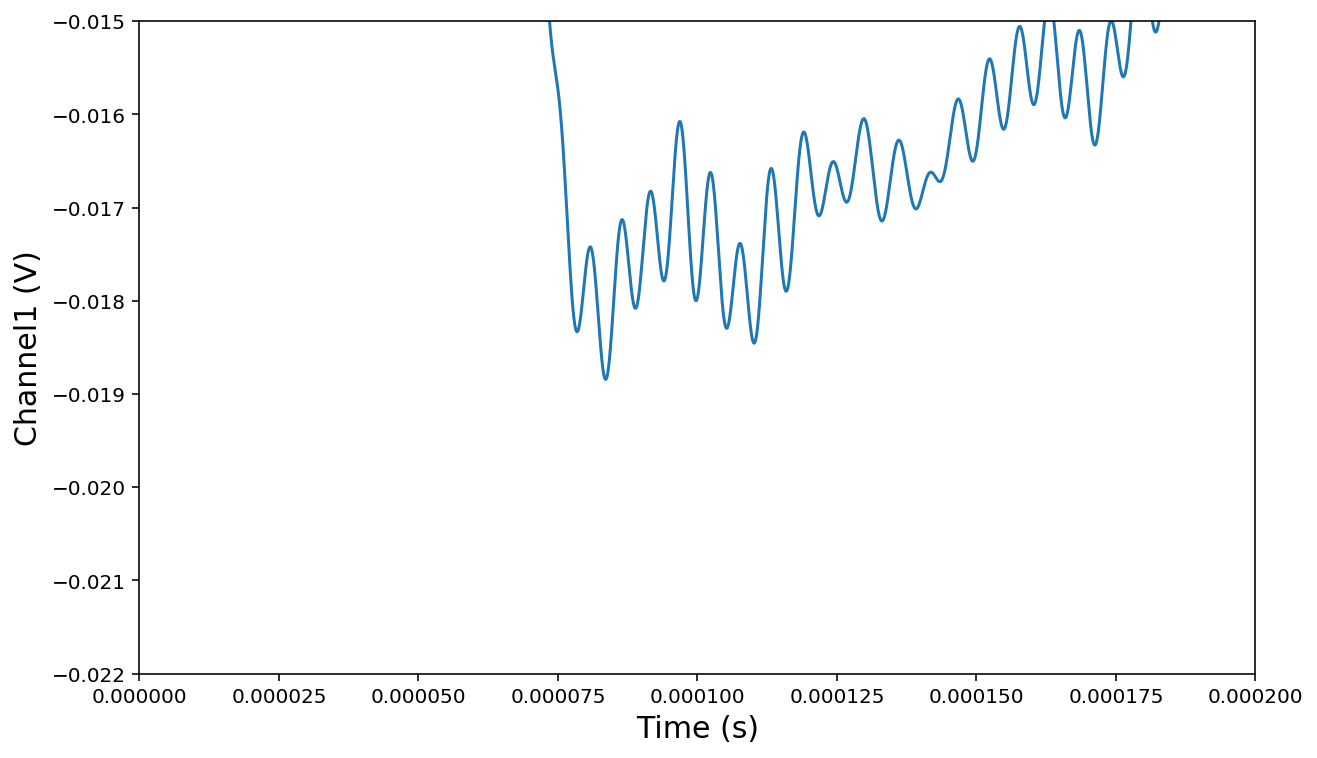

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal_filtered)
plt.xlabel("Time (s)", fontsize = 15)
plt.ylabel("Channel1 (V)", fontsize = 15)
plt.xlim(0, 0.0002)
plt.ylim(-0.022, -0.015)

In [23]:
min_y_1 = min(signal_filtered)
min_x_1 = t[np.argmin(signal_filtered)]

print("Minimum:", min_x_1, min_y_1.real)

Minimum: 8.3558e-05 -0.018843252556980963


(-0.022, -0.015)

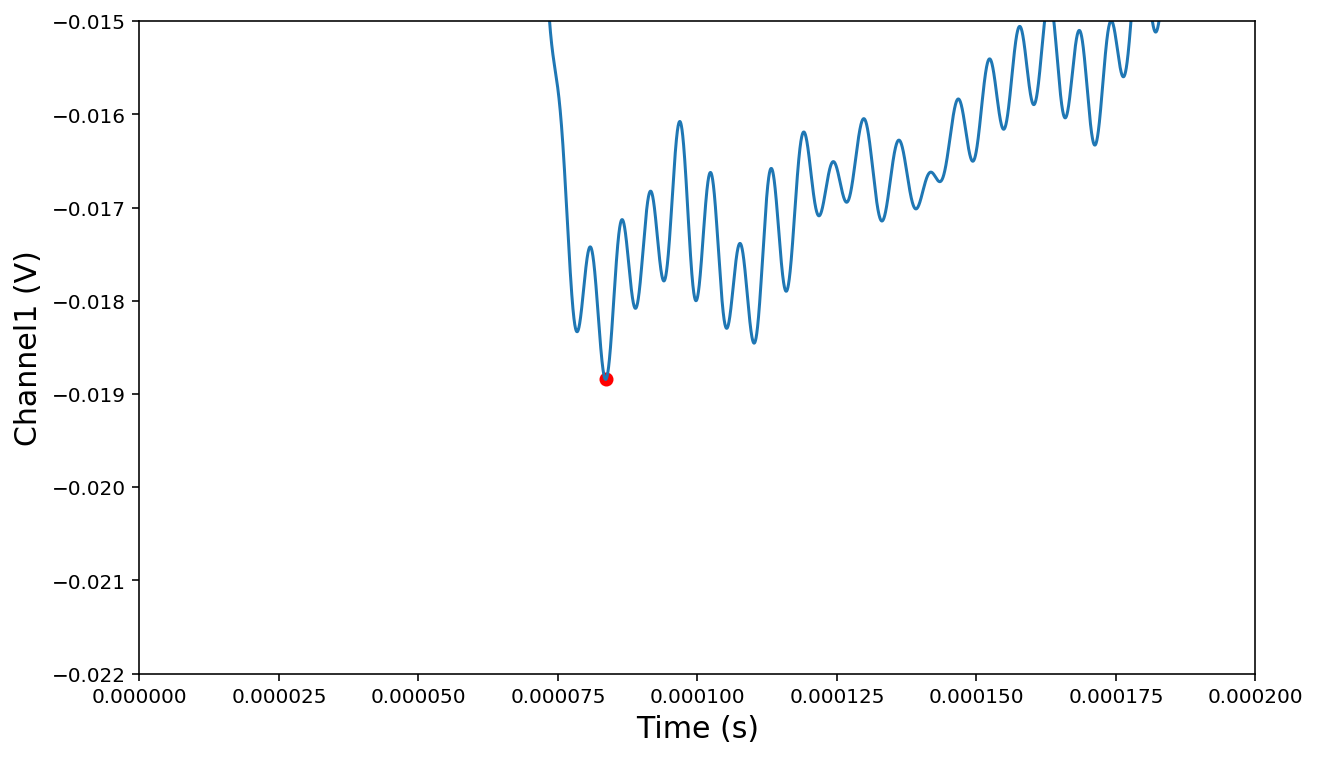

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal_filtered)
plt.scatter(min_x_1, min_y_1.real, c='r', marker='o')
plt.xlabel("Time (s)", fontsize = 15)
plt.ylabel("Channel1 (V)", fontsize = 15)
plt.xlim(0, 0.0002)
plt.ylim(-0.022, -0.015)

#### Maximum of channel 1

In [25]:
max_y_1 = max(signal_filtered)
max_x_1 = t[np.argmax(signal_filtered)]

print(max_y_1.real, max_x_1)

0.0068846525337209 5.3572e-05


Text(0, 0.5, 'Channel1 (V)')

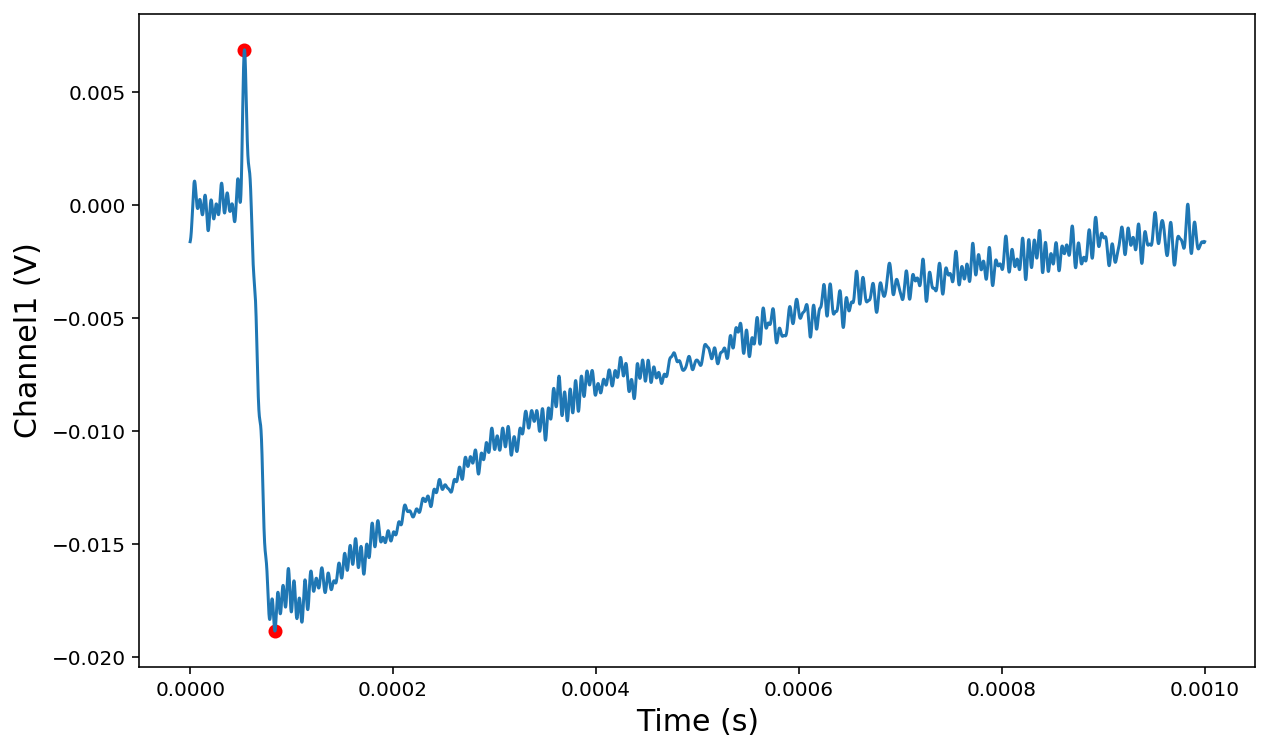

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal_filtered)
plt.scatter(max_x_1, max_y_1.real, c='r', marker='o')
plt.scatter(min_x_1, min_y_1.real, c='r', marker='o')
plt.xlabel("Time (s)", fontsize = 15)
plt.ylabel("Channel1 (V)", fontsize = 15)
#plt.xlim(0, 0.0002)
#plt.ylim(-0.022, -0.015)

#### Maximum of channel 2

(0, 0.02)

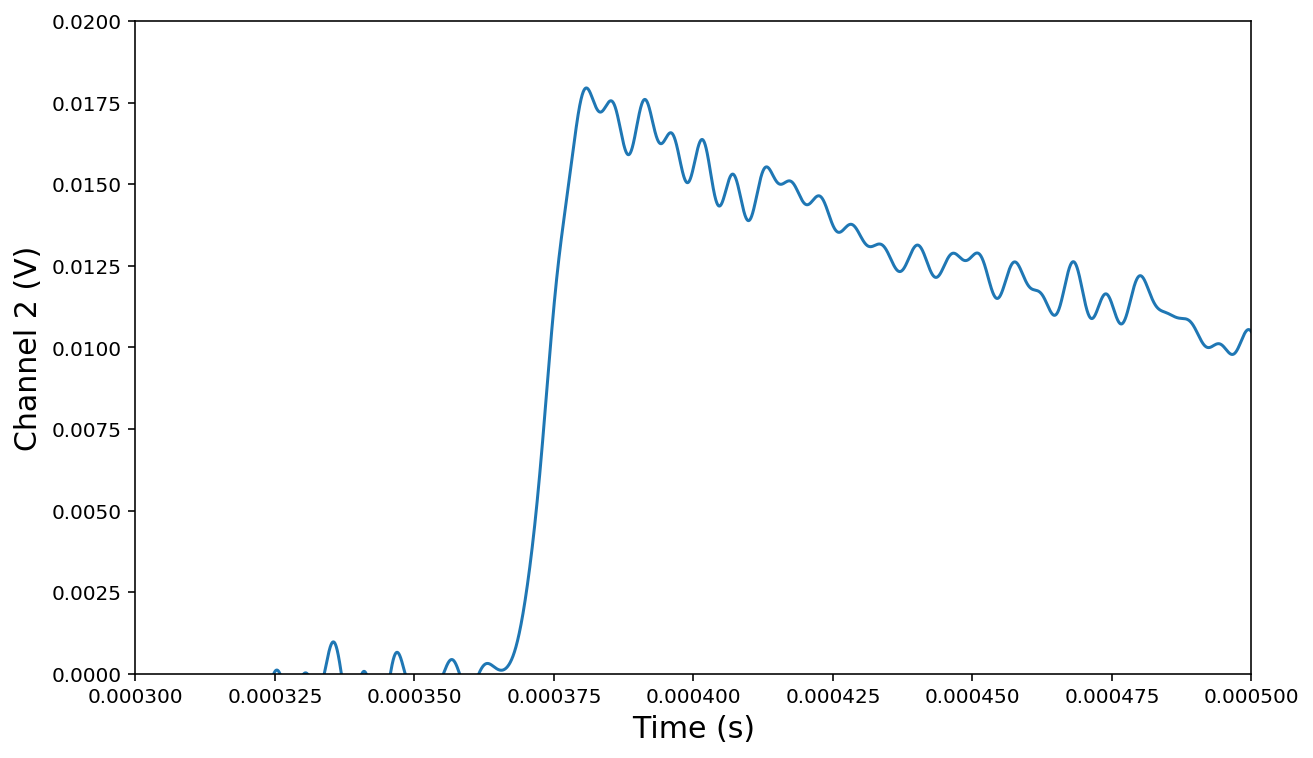

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal_filtered2)
plt.xlabel("Time (s)", fontsize = 15)
plt.ylabel("Channel 2 (V)", fontsize = 15)
plt.xlim(0.0003, 0.0005)
plt.ylim(0, 0.020)

In [28]:
max_y_2 = max(signal_filtered2[100000:])
max_x_2 = t[np.argmax(signal_filtered2[100000:]) + 100000]

Text(0, 0.5, 'Channel 2 (V)')

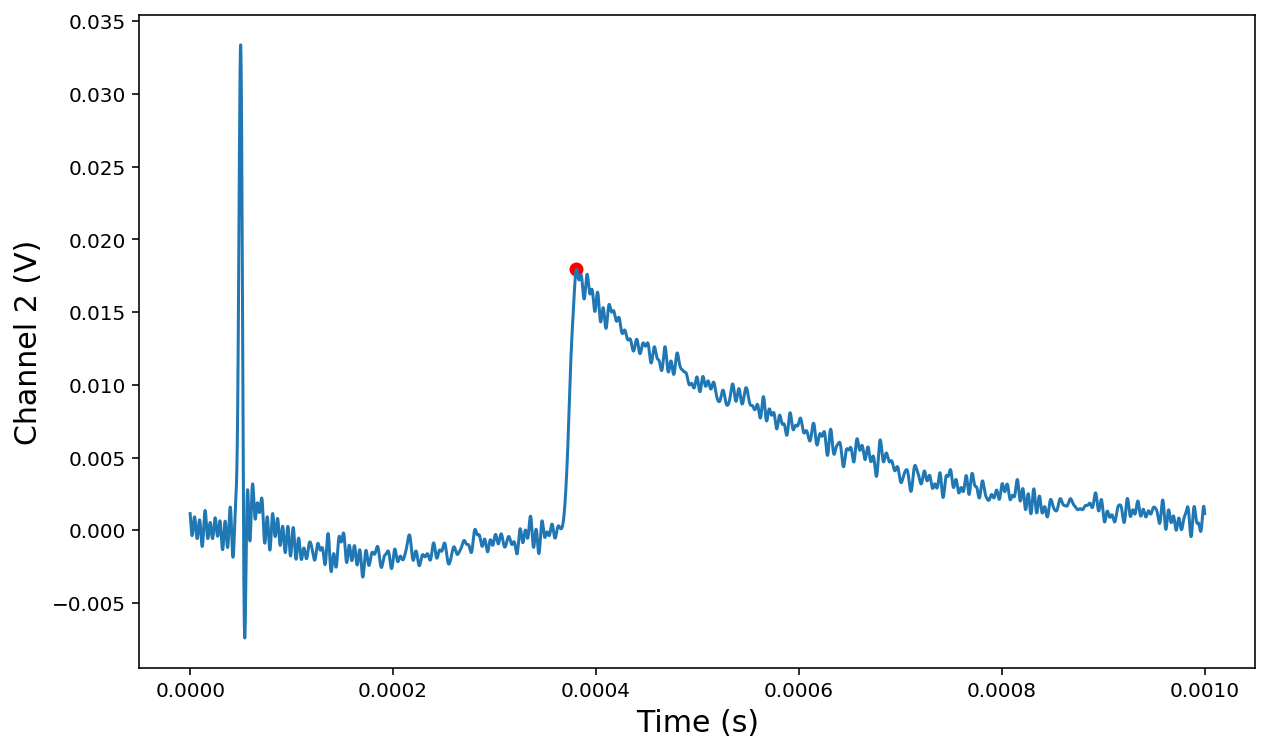

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal_filtered2)
plt.scatter(max_x_2, max_y_2.real, c='r', marker='o')
plt.xlabel("Time (s)", fontsize = 15)
plt.ylabel("Channel 2 (V)", fontsize = 15)
#plt.xlim(0.0003, 0.0005)
#plt.ylim(0, 0.020)

#### Finding the point that comes before maximum of channel 2

In [30]:
# from above
max_index = np.argmax(signal_filtered2[100000:]) + 100000
max_y_2= signal_filtered2[max_index]
max_x_2 = t[max_index]

t3_x = 0
t3_y = 0

# Start from the maximum and move towards the left until y is close to 0
threshold = 0.02  # The allowed difference between y and 0
for i in range(max_index, -1, -1):
    if abs(signal_filtered2[i] - 0) < threshold:
        print(t[i], signal_filtered2[i].real)
        t3_x = t[i]
        t3_y = signal_filtered2[i].real
        break

0.00036908000000000004 0.0014839146367693113


Text(0, 0.5, 'Channel 2 (V)')

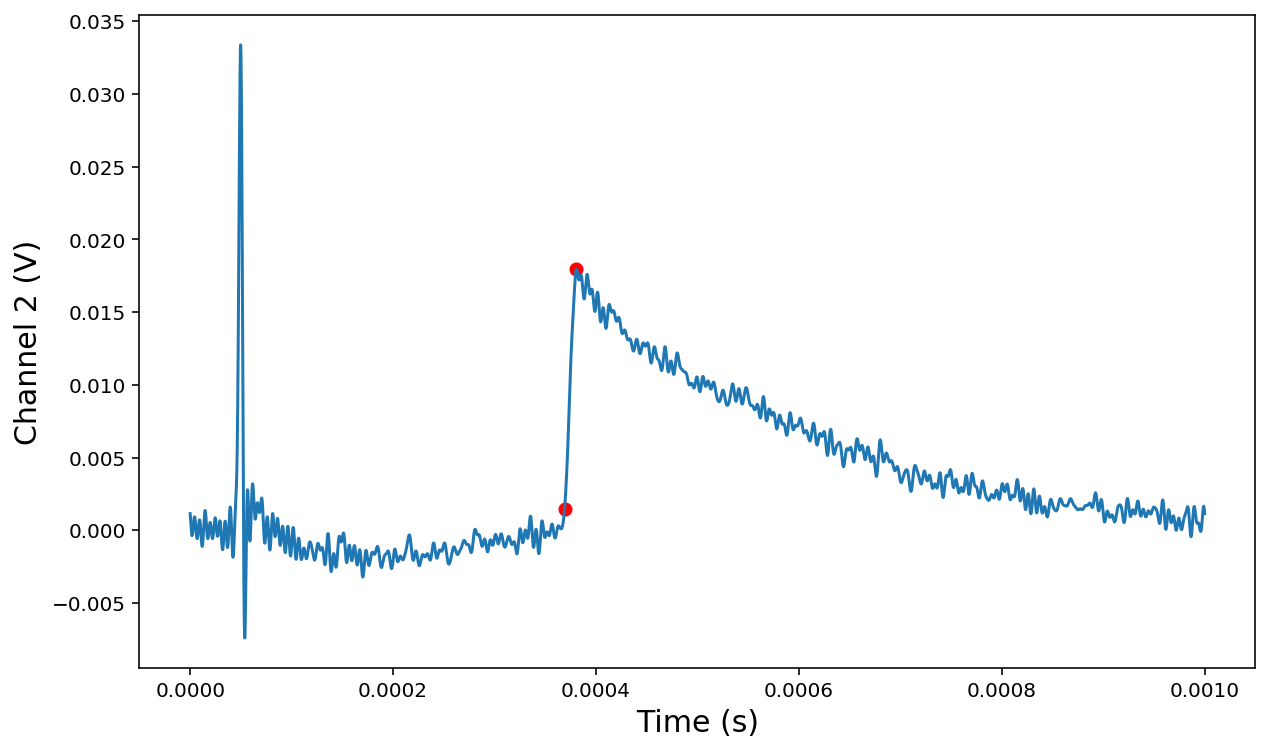

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal_filtered2)
plt.scatter(max_x_2, max_y_2.real, c='r', marker='o')
plt.scatter(t3_x, t3_y, c='r', marker='o')
plt.xlabel("Time (s)", fontsize = 15)
plt.ylabel("Channel 2 (V)", fontsize = 15)

### For channel 1 and 2, we have found all the points needed to calculate t1, t2, and t3. 


### To find t1, we find the difference between the maximum and minimum(or Q_k) that we found of channel 1:

In [32]:
t1_12 = min_x_1 - max_x_1
t1_12

2.9986e-05

### To find t2, we use Q_k and the point that comes before Q_a:

In [33]:
t2_12 = t3_x - min_x_1
t2_12

0.000285522

### Finally t3:

In [34]:
t3_12 = max_x_2 - t3_x
t3_12

1.1734000000000007e-05

In [35]:
Q_a_12 = max_y_2.real
Q_k_12 = min_y_1.real

print(Q_k_12, Q_a_12)

-0.018843252556980963 0.017955748366683153


# Calculating the lifetime

In [36]:
# equation to calculate lifetime 

T = -(1/np.log(abs(Q_a_12/Q_k_12)))*(t2_12+((t1_12+t3_12)/2))*1e3
T

6.350598285625956

# Doing the same with channel 4 and 5

In [37]:
# Max and Min points of channel 4

min_y2_1 = min(signal_filtered3)
min_x2_1 = t[np.argmin(signal_filtered3)]

print("Minimum:", min_x2_1, min_y2_1.real)

Minimum: 7.828200000000001e-05 -0.010137199611659957


In [38]:
max_y2_1 = max(signal_filtered3)
max_x2_1 = t[np.argmax(signal_filtered3)]

print(max_y2_1.real, max_x2_1)

0.013049839567657135 4.9624000000000005e-05


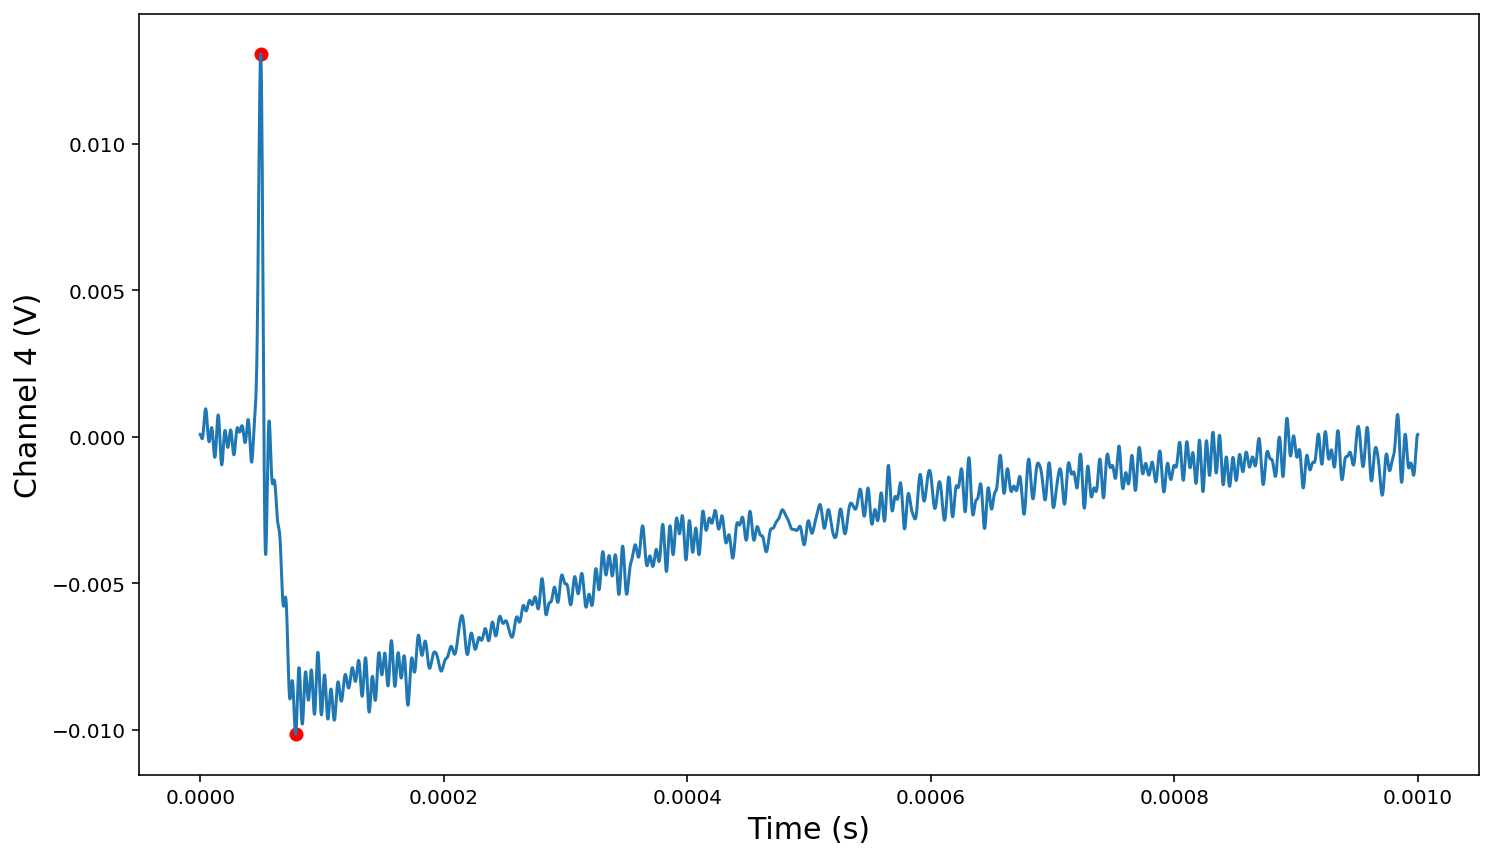

In [39]:
plt.plot(t, signal_filtered3)
plt.xlabel("Time (s)", fontsize = 15)
plt.ylabel("Channel 4 (V)", fontsize = 15)
plt.scatter(min_x2_1, min_y2_1.real, c='r', marker='o')
plt.scatter(max_x2_1, max_y2_1.real, c='r', marker='o')

In [40]:
max_y2_2 = max(signal_filtered4)
max_x2_2 = t[np.argmax(signal_filtered4)]

print(max_y2_2.real, max_x2_2)

0.008106474492060721 0.000363384


In [41]:
# from above
max_index_2 = np.argmax(signal_filtered4)
max_y2_2= signal_filtered4[max_index_2]
max_x2_2 = t[max_index_2]

t3_x2 = 0
t3_y2 = 0

# Start from the maximum and move towards the left until y is close to 0
threshold = 0.008  # The allowed difference between y and 0
for i in range(max_index_2, -1, -1):
    if abs(signal_filtered4[i] - 0) < threshold:
        print(t[i], signal_filtered4[i].real)
        t3_x2 = t[i]
        t3_y2 = signal_filtered4[i].real
        break

0.000348948 0.00045215749177518125


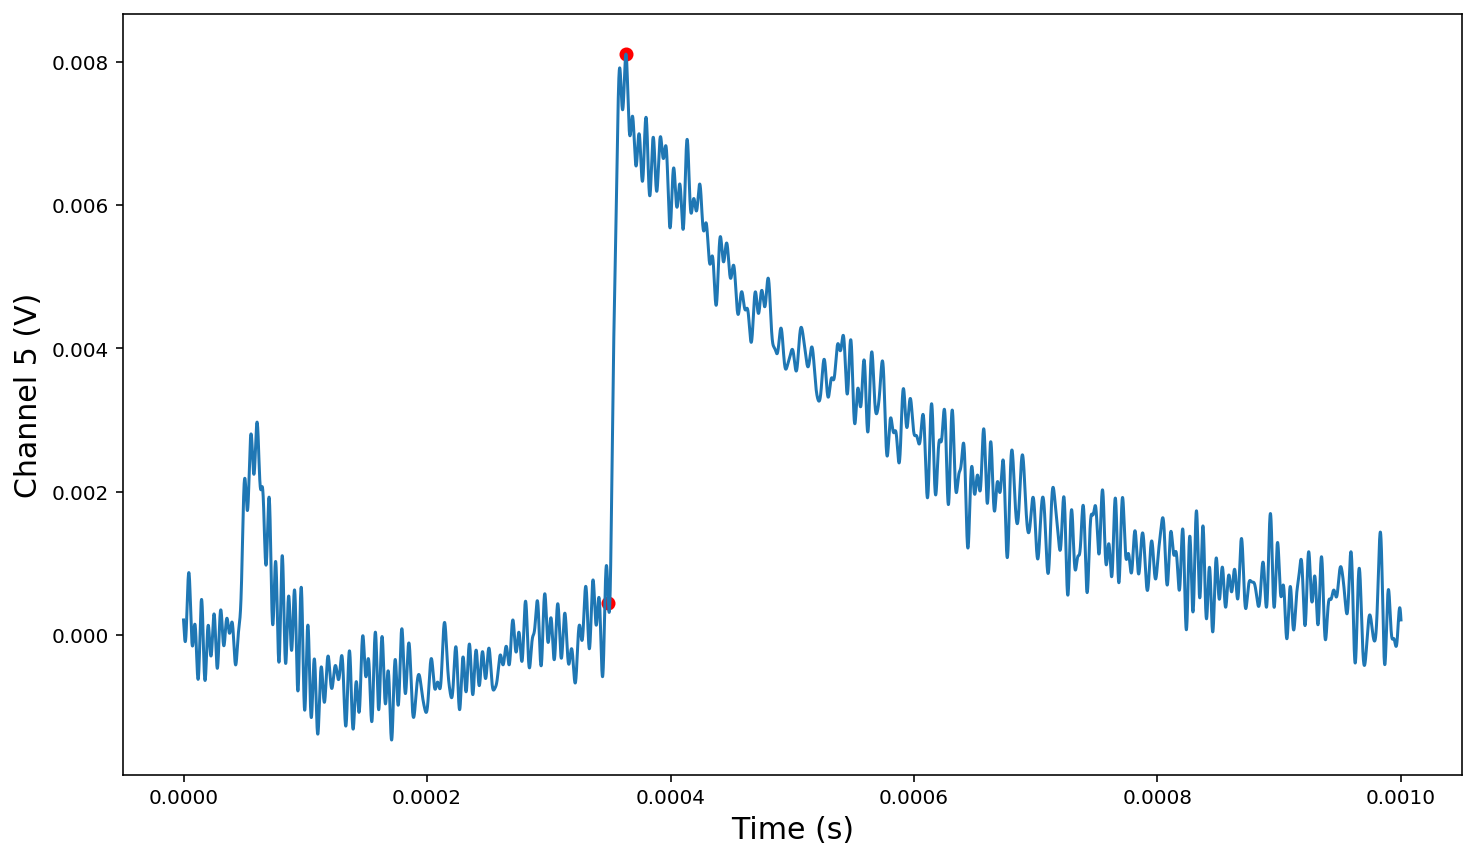

In [42]:
plt.plot(t, signal_filtered4)
plt.xlabel("Time (s)", fontsize = 15)
plt.ylabel("Channel 5 (V)", fontsize = 15)
plt.scatter(max_x2_2, max_y2_2.real, c='r', marker='o')
plt.scatter(t3_x2, t3_y2.real, c='r', marker='o')

### Therefore, we also found all the points needed to calculate t1, t2, and t3 for channel 4 and 5 which is our second monitor.

In [43]:
t1_45 = min_x2_1 - max_x2_1
t1_45

2.8658000000000002e-05

In [44]:
t2_45 = t3_x2 - min_x2_1
t2_45

0.00027066600000000003

In [45]:
t3_45 = max_x2_2 - t3_x2
t3_45

1.4435999999999995e-05

In [46]:
Q_a_45 = max_y2_2.real
Q_k_45 = min_y2_1.real

print(Q_k_45, Q_a_45)


# equation to calculate lifetime 

T = -(1/np.log(abs(Q_a_45/Q_k_45)))*(t2_45+((t1_45+t3_45)/2))*1e3
T

-0.010137199611659957 0.008106474492060721


1.30715574306186

# Calculating root mean square of all channels

In [47]:
# only using initial points 

Text(0, 0.5, 'Channel1 (V)')

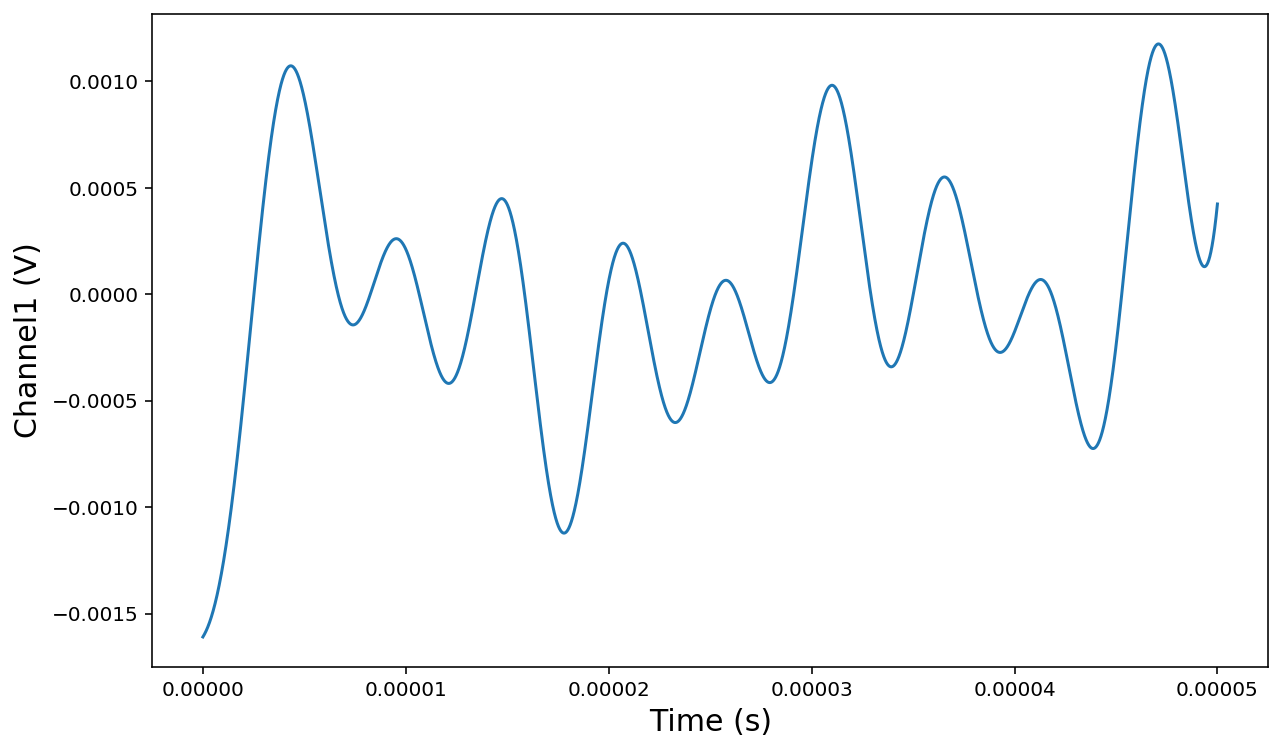

In [48]:
# channel 1

plt.figure(figsize=(10, 6))
plt.plot(t[:25000], signal_filtered[:25000])
plt.xlabel("Time (s)", fontsize = 15)
plt.ylabel("Channel1 (V)", fontsize = 15)

In [49]:
# calculate the RMS of channel 1 using the mean and sqrt methods

rms = np.sqrt((signal_filtered[:25000]**2).mean())
rms = rms.real

Text(0, 0.5, 'Channel 2 (V)')

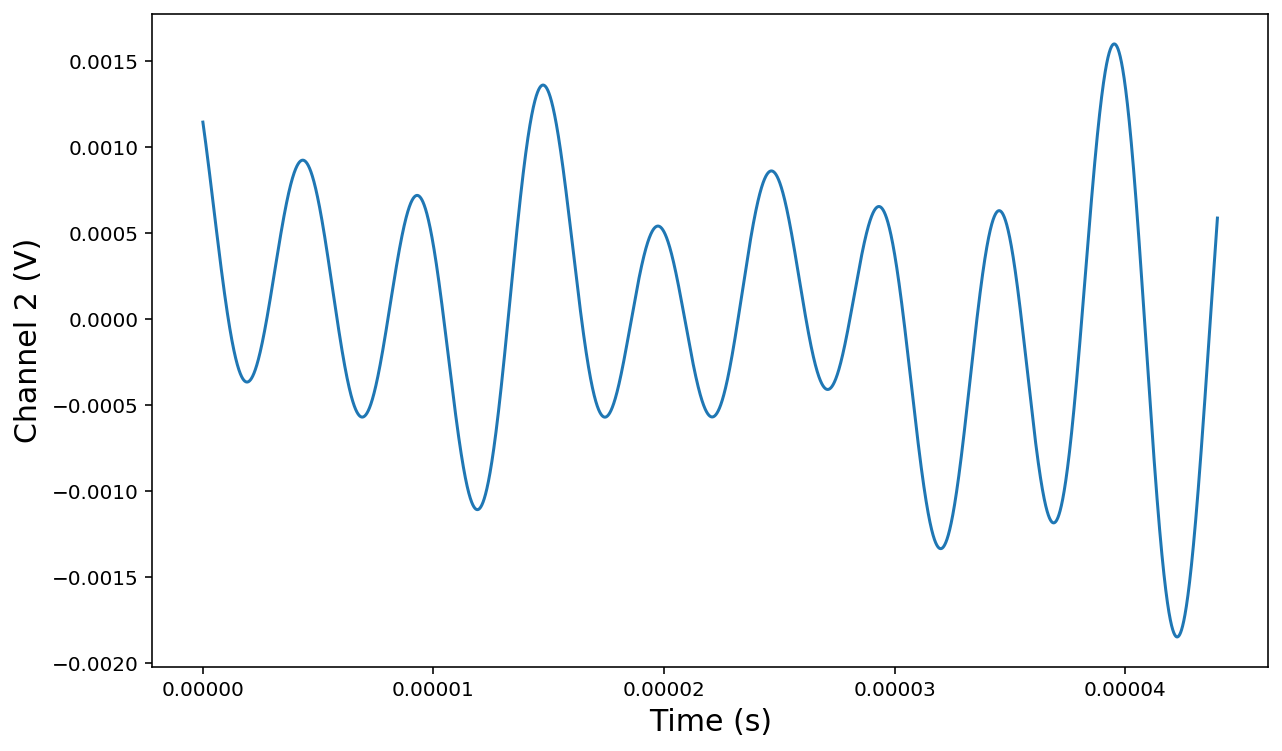

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(t[:22000], signal_filtered2[:22000])
plt.xlabel("Time (s)", fontsize = 15)
plt.ylabel("Channel 2 (V)", fontsize = 15)

In [51]:
# calculate the RMS of channel 2 using the mean and sqrt methods

rms2 = np.sqrt((signal_filtered2[:22000]**2).mean())
rms2 = rms2.real

Text(0, 0.5, 'Channel 4 (V)')

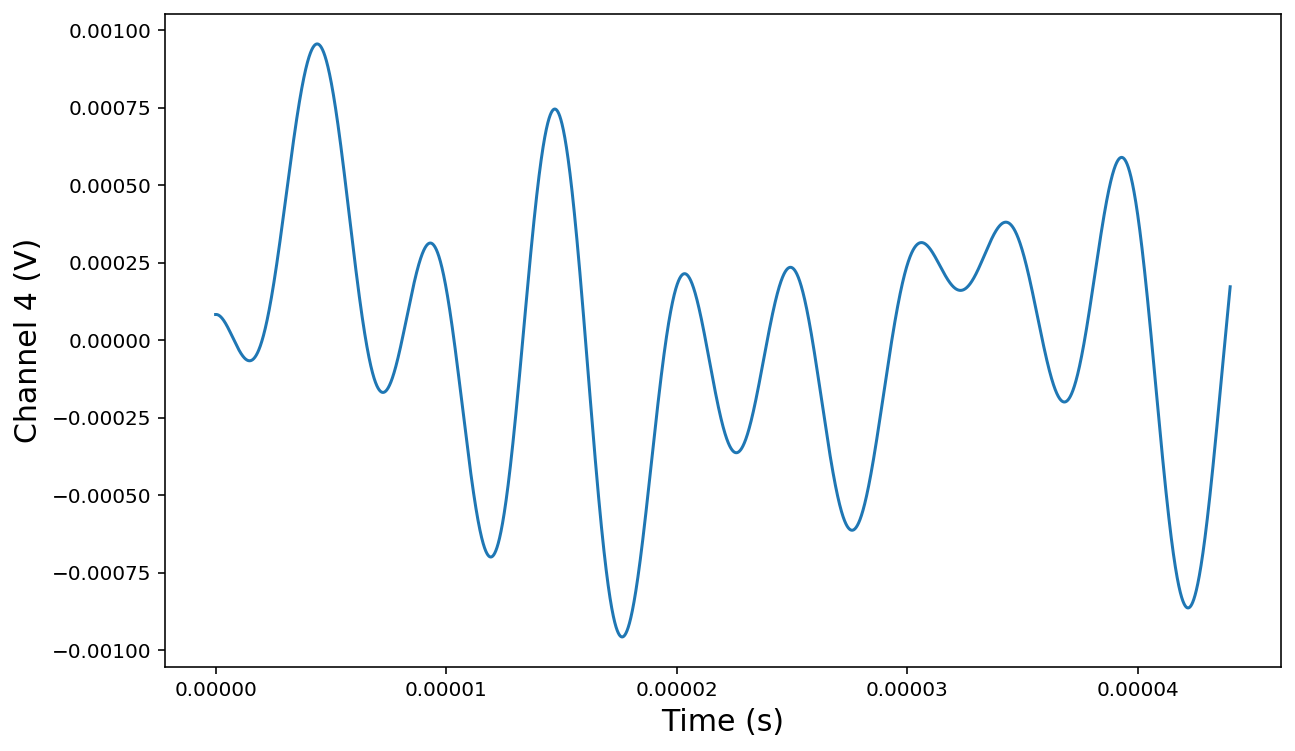

In [52]:
# channel 4

plt.figure(figsize=(10, 6))
plt.plot(t[:22000], signal_filtered3[:22000])
plt.xlabel("Time (s)", fontsize = 15)
plt.ylabel("Channel 4 (V)", fontsize = 15)

In [53]:
# calculate the RMS of channel 4 using the mean and sqrt methods

rms4 = np.sqrt((signal_filtered3[:22000]**2).mean())
rms4 = rms4.real

Text(0, 0.5, 'Channel 5 (V)')

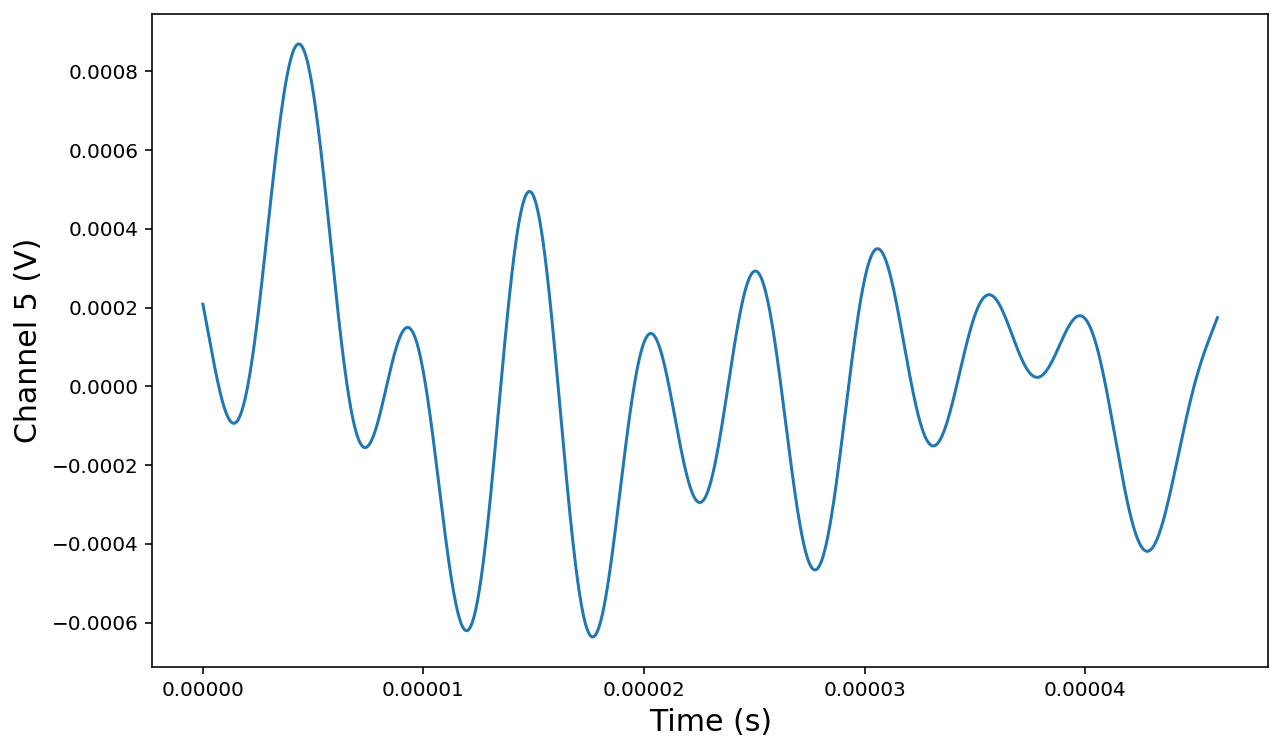

In [54]:
# channel 5

plt.figure(figsize=(10, 6))
plt.plot(t[:23000], signal_filtered4[:23000])
plt.xlabel("Time (s)", fontsize = 15)
plt.ylabel("Channel 5 (V)", fontsize = 15)

In [55]:
# calculate the RMS of channel 5 using the mean and sqrt methods

rms5 = np.sqrt((signal_filtered4[:23000]**2).mean())
rms5 = rms5.real

In [56]:
# example errors
    

#T = -(1/np.log(abs(Q_a/(Q_k ) )))*(t2+((t1+t3)/2))*1e3
#T_errK1 = -(1/np.log(abs(Q_a/(Q_k +rms4 ) )))*(t2+((t1+t3)/2))*1e3
#T_errK2 = -(1/np.log(abs(Q_a/(Q_k -rms4 ) )))*(t2+((t1+t3)/2))*1e3
#print( Q_k , Q_k +rms4  , Q_k -rms4  )
#print(abs(Q_a/(Q_k )), abs(Q_a/(Q_k +rms4 )) , abs(Q_a/(Q_k -rms4 )) )
#print(T, T_errK1, T_errK2)
#print(T, T-T_errK1, T-T_errK2)

In [57]:
#T_errA1 = -(1/np.log(abs((Q_a+rms5)/(Q_k ) )))*(t2+((t1+t3)/2))*1e3
#T_errA2 = -(1/np.log(abs((Q_a-rms5)/(Q_k ) )))*(t2+((t1+t3)/2))*1e3
#print(T, T-T_errA1, T-T_errA2)

# Errors

In [58]:
# channel 1 and 2

# cathod

T = -(1/np.log(abs(Q_a_12/(Q_k_12))))*(t2_12+((t1_12+t3_12)/2))*1e3
T_errK1_12 = -(1/np.log(abs(Q_a_12/(Q_k_12+rms))))*(t2_12+((t1_12+t3_12)/2))*1e3
T_errK2_12 = -(1/np.log(abs(Q_a_12/(Q_k_12-rms))))*(t2_12+((t1_12+t3_12)/2))*1e3

errK1_12 = T-T_errK1_12
errK2_12 = T-T_errK2_12

print(T, errK1_12, errK2_12)

6.350598285625956 -0.9683103907448602 0.7378687662272698


In [59]:
# anode

T_errA1_12 = -(1/np.log(abs((Q_a_12+rms2)/(Q_k_12))))*(t2_12+((t1_12+t3_12)/2))*1e3
T_errA2_12 = -(1/np.log(abs((Q_a_12-rms2)/(Q_k_12))))*(t2_12+((t1_12+t3_12)/2))*1e3

errA1_12 = T-T_errA1_12
errA2_12 = T-T_errA2_12

print(T, errA1_12, errA2_12)


6.350598285625956 -1.7577226930567669 1.1412242329054587


In [60]:
np.sqrt((errK1_12**2)+(errA1_12**2))

2.006791986856435

In [61]:
np.sqrt((errK2_12**2)+(errA2_12**2))

1.358986043322155

In [62]:
# channel 4 and 5

# cathod

T = -(1/np.log(abs(Q_a_45/(Q_k_45))))*(t2_45+((t1_45+t3_45)/2))*1e3
T_errK1_45 = -(1/np.log(abs(Q_a_45/(Q_k_45+rms4))))*(t2_45+((t1_45+t3_45)/2))*1e3
T_errK2_45 = -(1/np.log(abs(Q_a_45/(Q_k_45-rms4))))*(t2_45+((t1_45+t3_45)/2))*1e3

errK1_45 = T-T_errK1_45
errK2_45 = T-T_errK2_45

#print(T, T_errK1, T_errK2)
print(T, errK1_45, errK2_45)

1.30715574306186 -0.030842003676506025 0.02930456677279647


In [63]:
# anode

T_errA1_45 = -(1/np.log(abs((Q_a_45+rms5)/(Q_k_45))))*(t2_45+((t1_45+t3_45)/2))*1e3
T_errA2_45 = -(1/np.log(abs((Q_a_45-rms5)/(Q_k_45))))*(t2_45+((t1_45+t3_45)/2))*1e3

errA1_45 = T-T_errA1_45
errA2_45 = T-T_errA2_45

print(T, errA1_45, errA2_45)

1.30715574306186 -0.03271814869500922 0.031325282045109315


In [64]:
np.sqrt((errK1_45**2)+(errA1_45**2))

0.04496339005024359

In [65]:
np.sqrt((errK2_45**2)+(errA2_45**2))

0.042895581694936076